<a href="https://colab.research.google.com/github/Abhishek3102/COMPUTE-ML-BOOTCAMP/blob/main/Copy_of_Final_ML_Bootcamp_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Model Goal:**
### The goal of our machine learning model is to predict the risk category of loans based on various loan-related features such as the amount, interest rate, installment, and employment length. This model aims to classify loans into different risk categories (e.g., high risk, moderate risk, low risk) to help financial institutions manage their portfolios more effectively and make informed lending decisions. Given the imbalanced nature of the dataset, we will use ensemble learning methods, such as Random Forest and XGBoost, along with Logistic Regression and Decision Trees, to achieve robust predictive performance. Feature engineering, label encoding, and outlier removal will be performed to prepare the data for training these models.

## **Machine Learning Model:-**

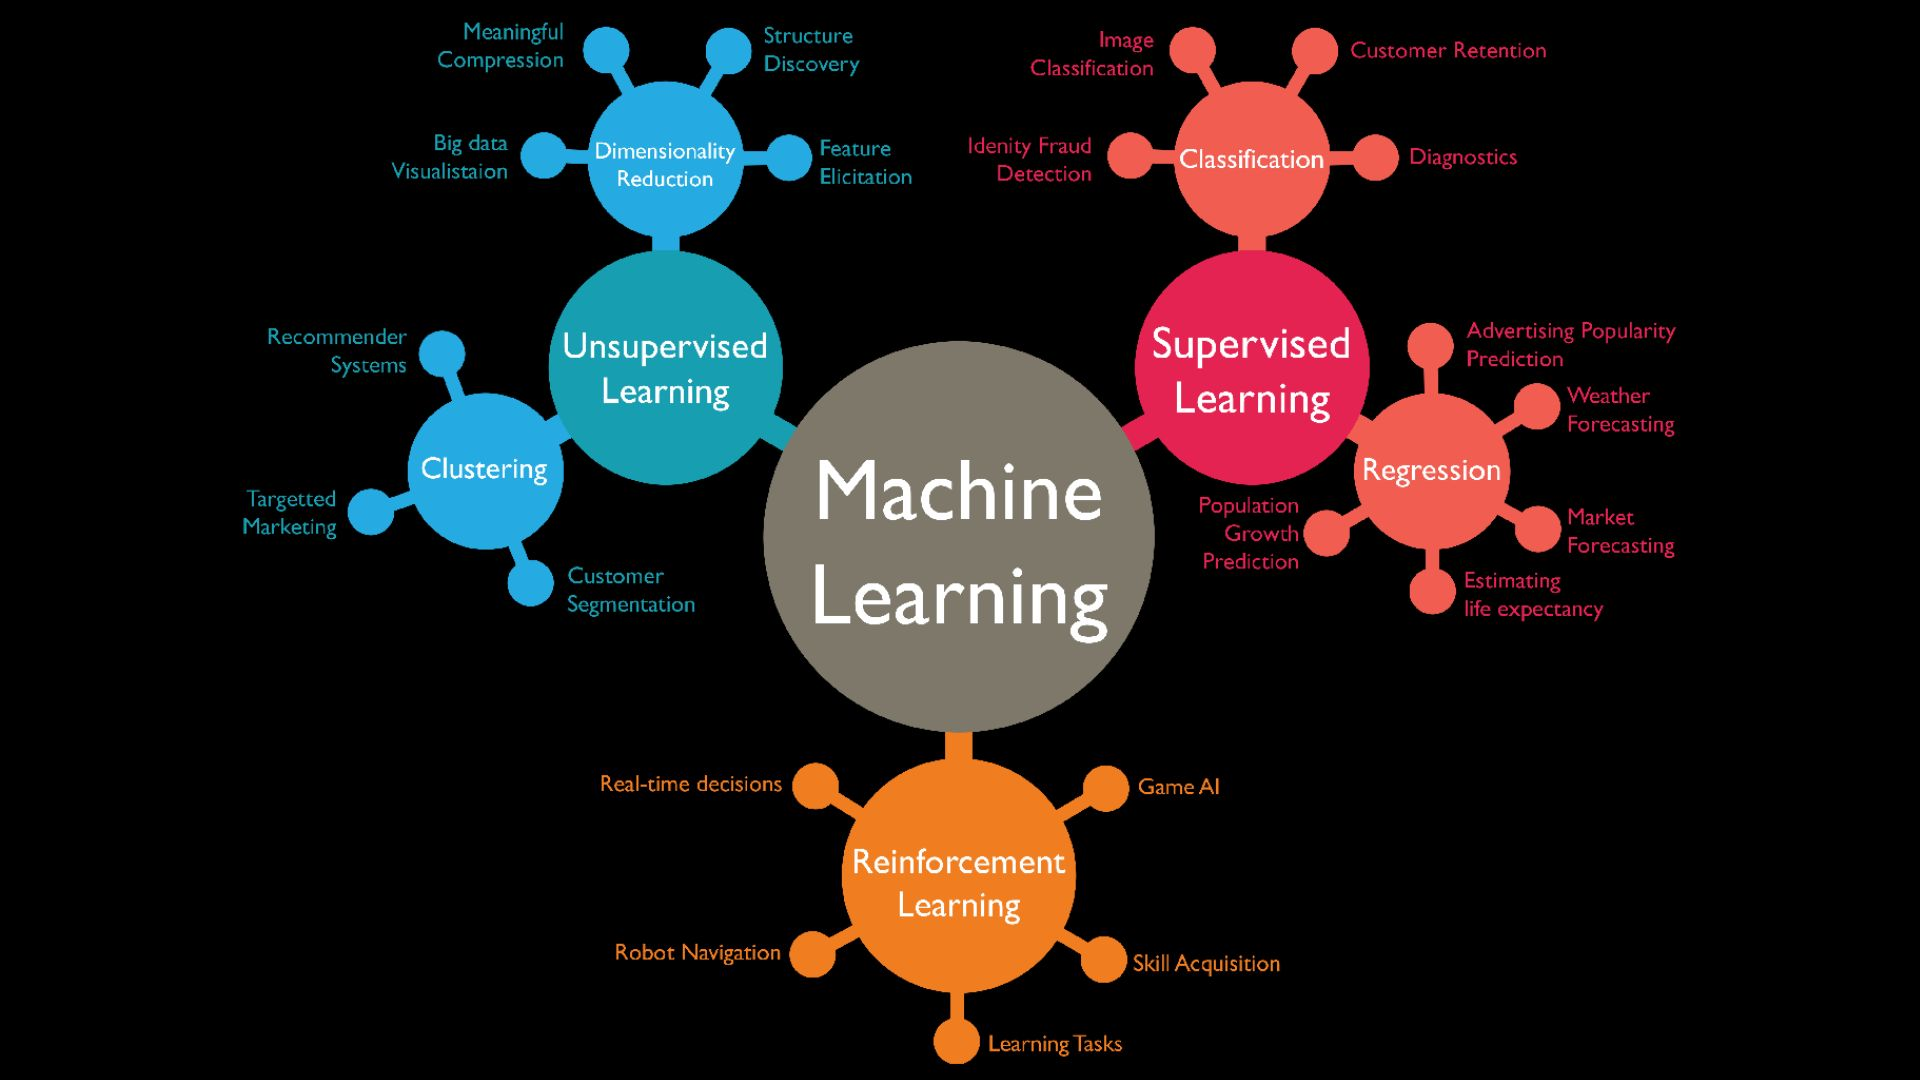

## Supervised learning

---


### It is the most common type of machine learning. It is used when you have labeled data, meaning that you know the desired output for each input.


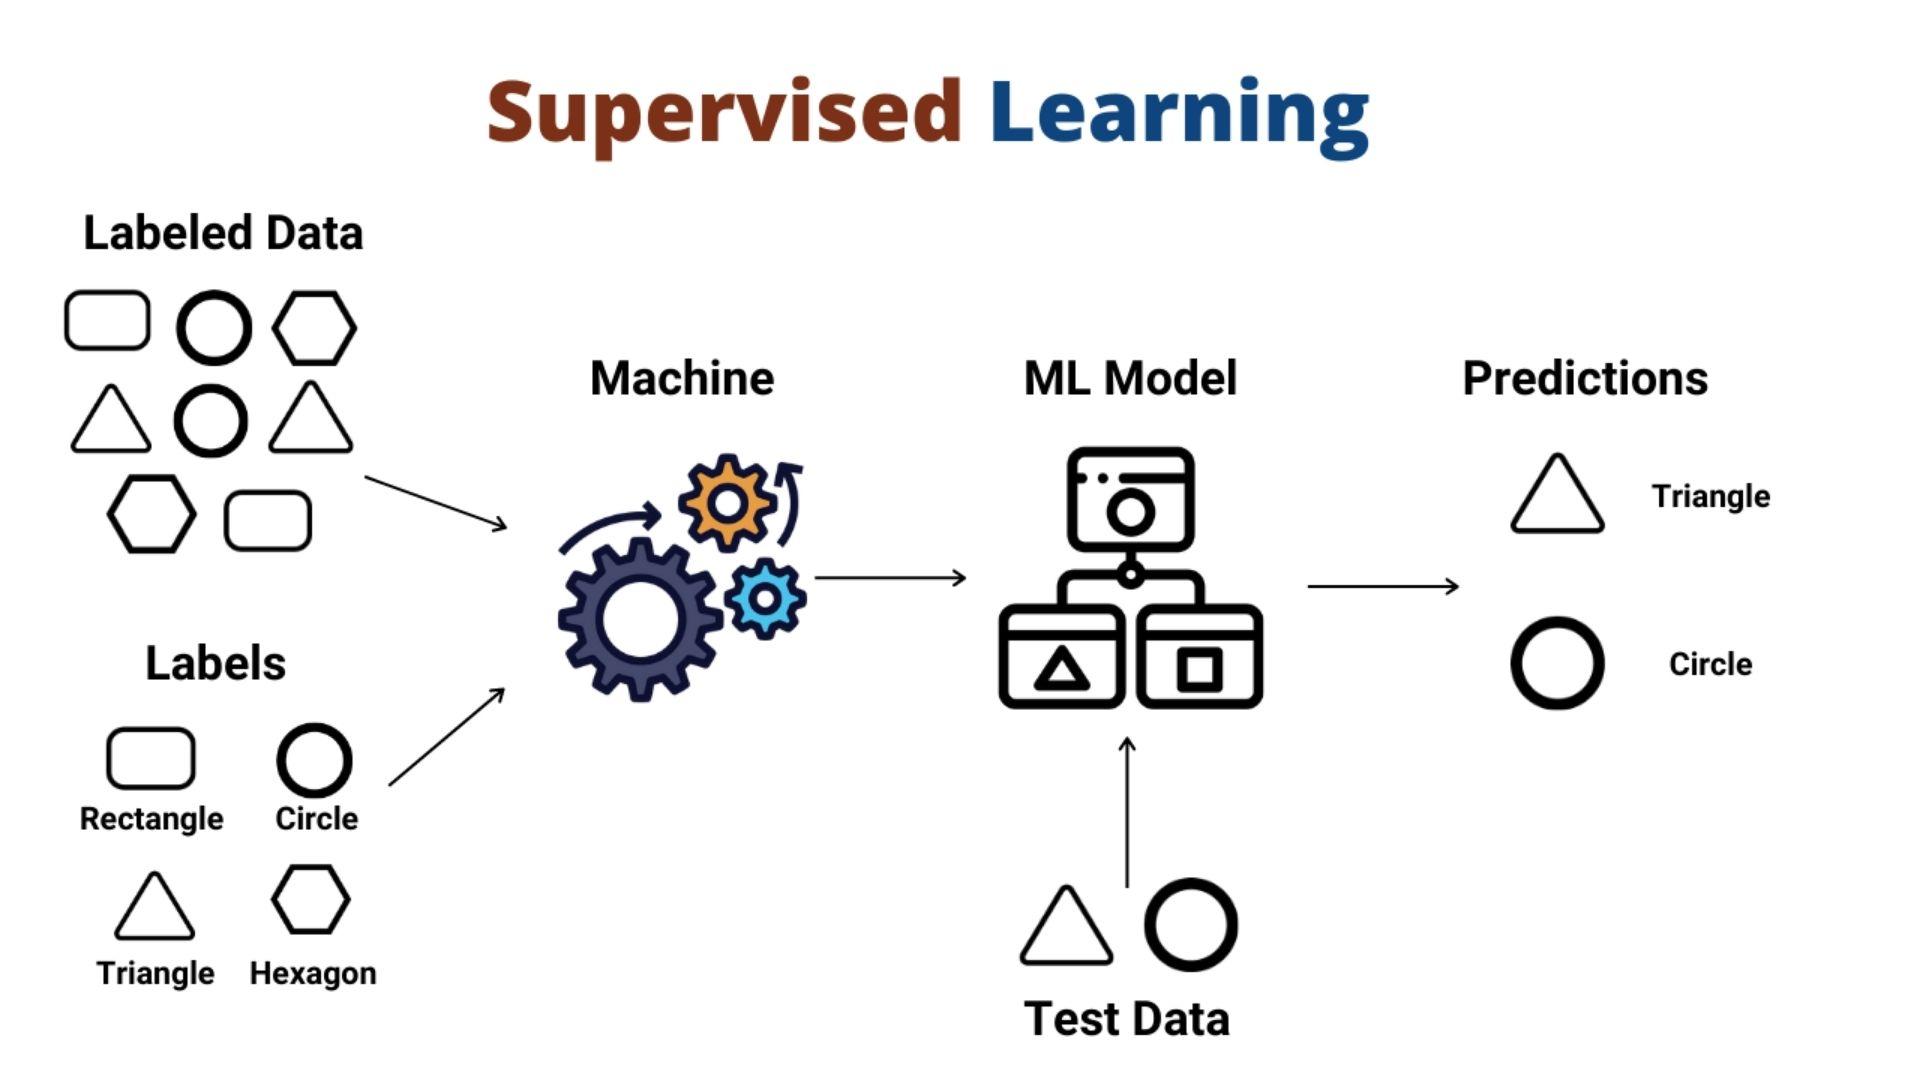

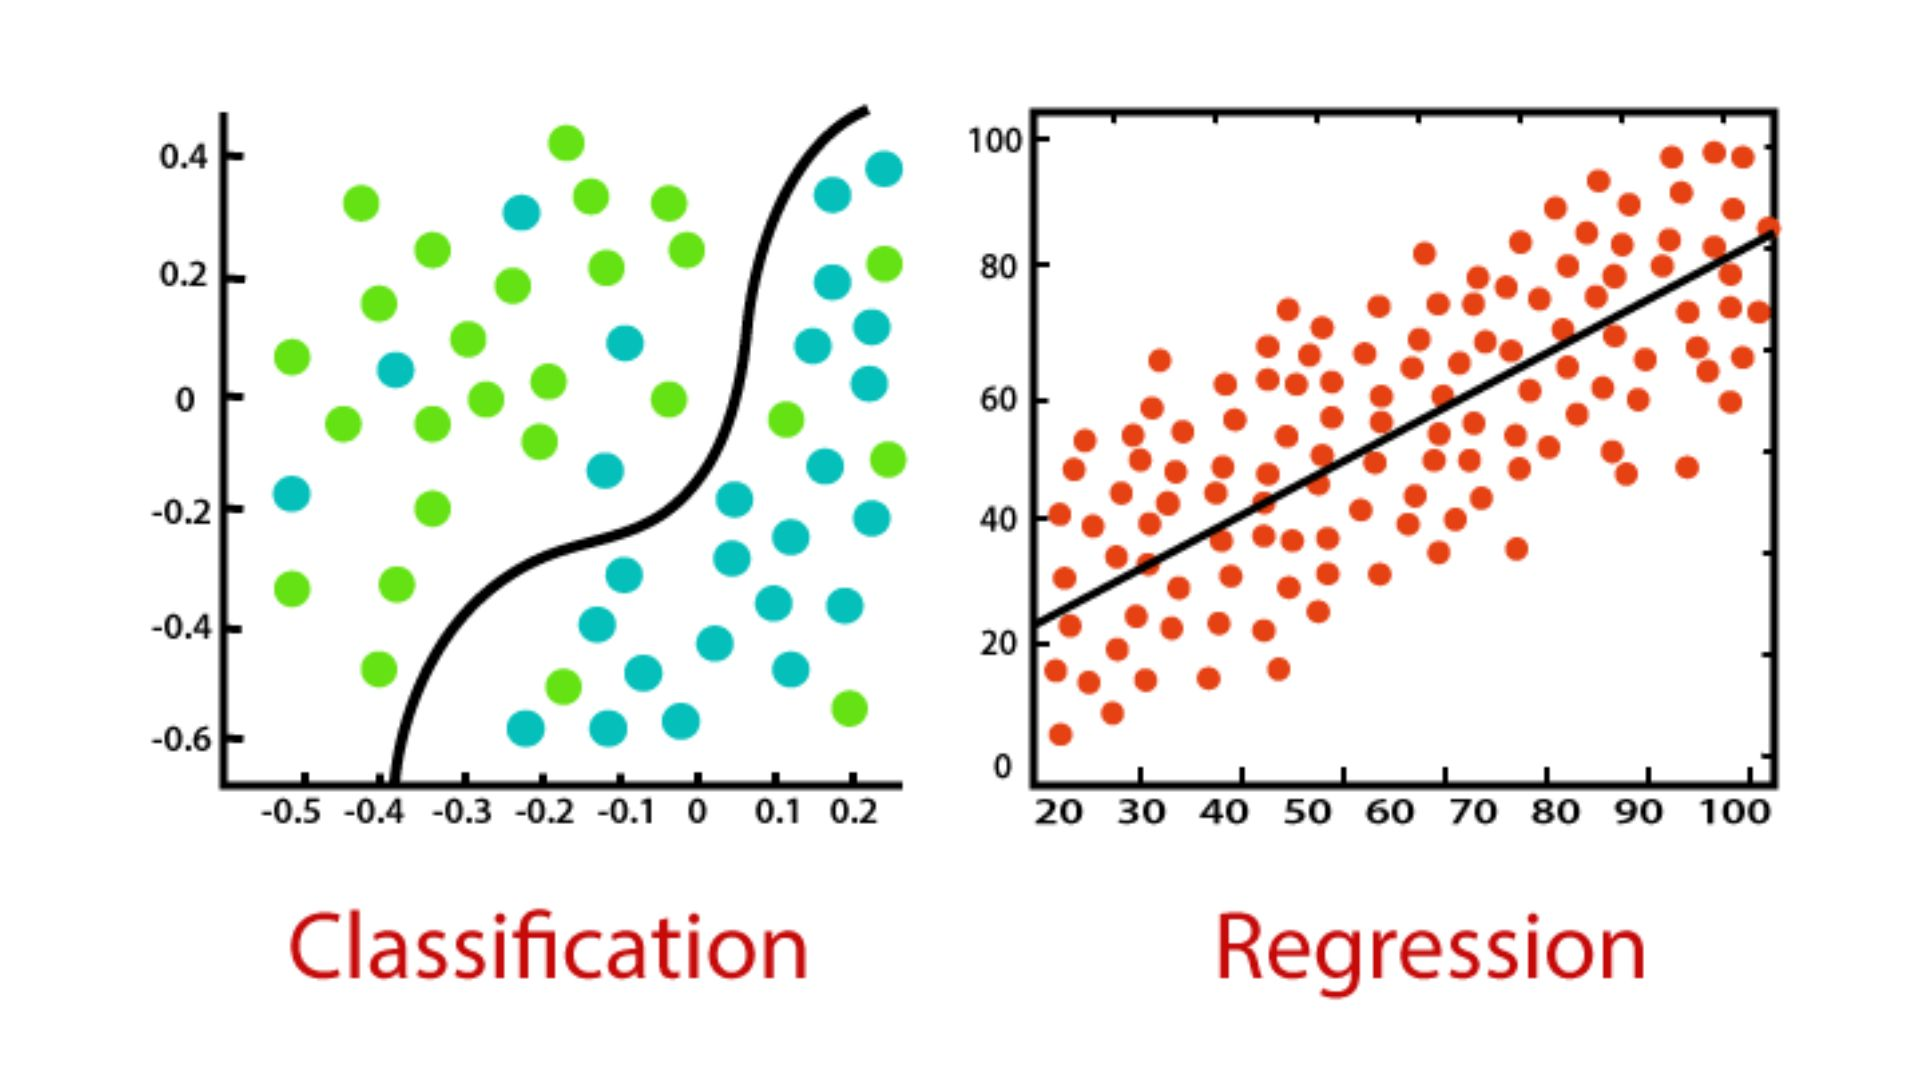

## Unsupervised learning

---


### It is used when you do not have labeled data. The model learns to find patterns in the data without being explicitly told what to look for.


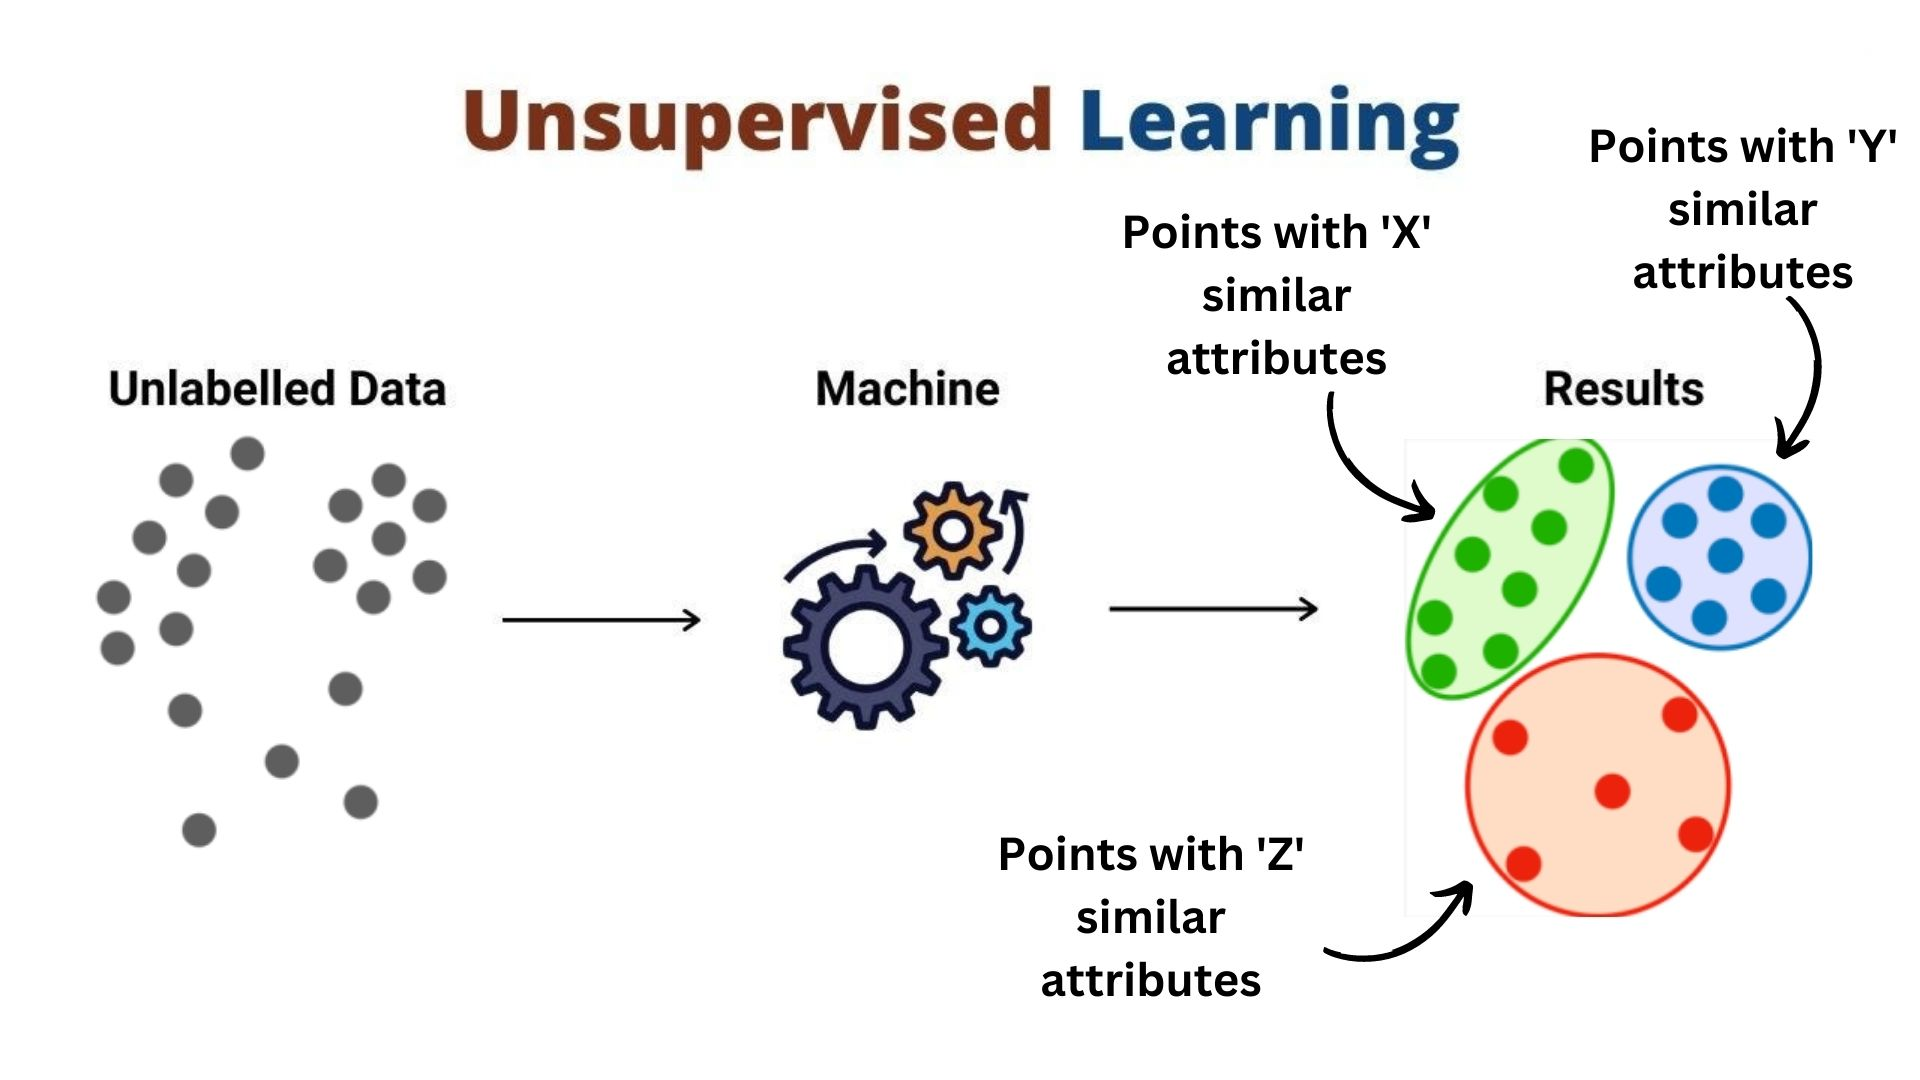

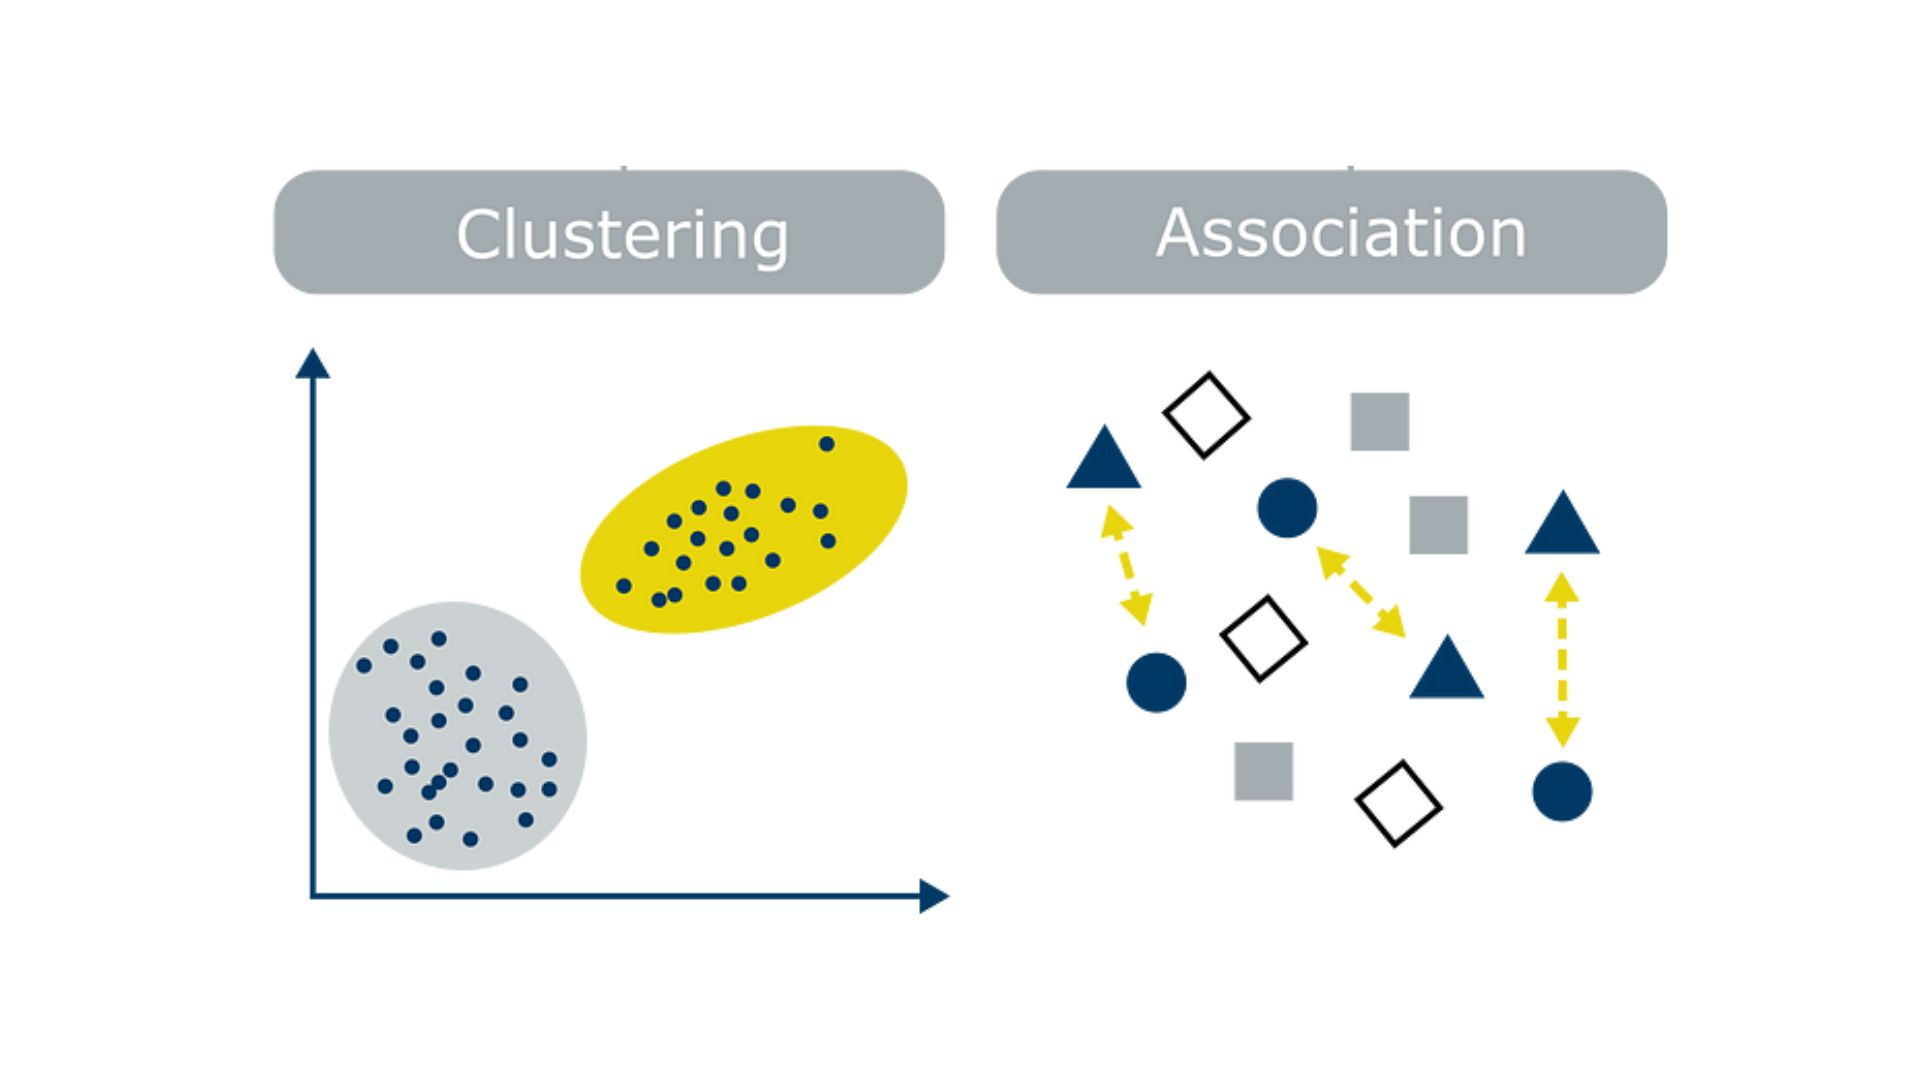

## Supervised Classification vs Unsupervised Clustering

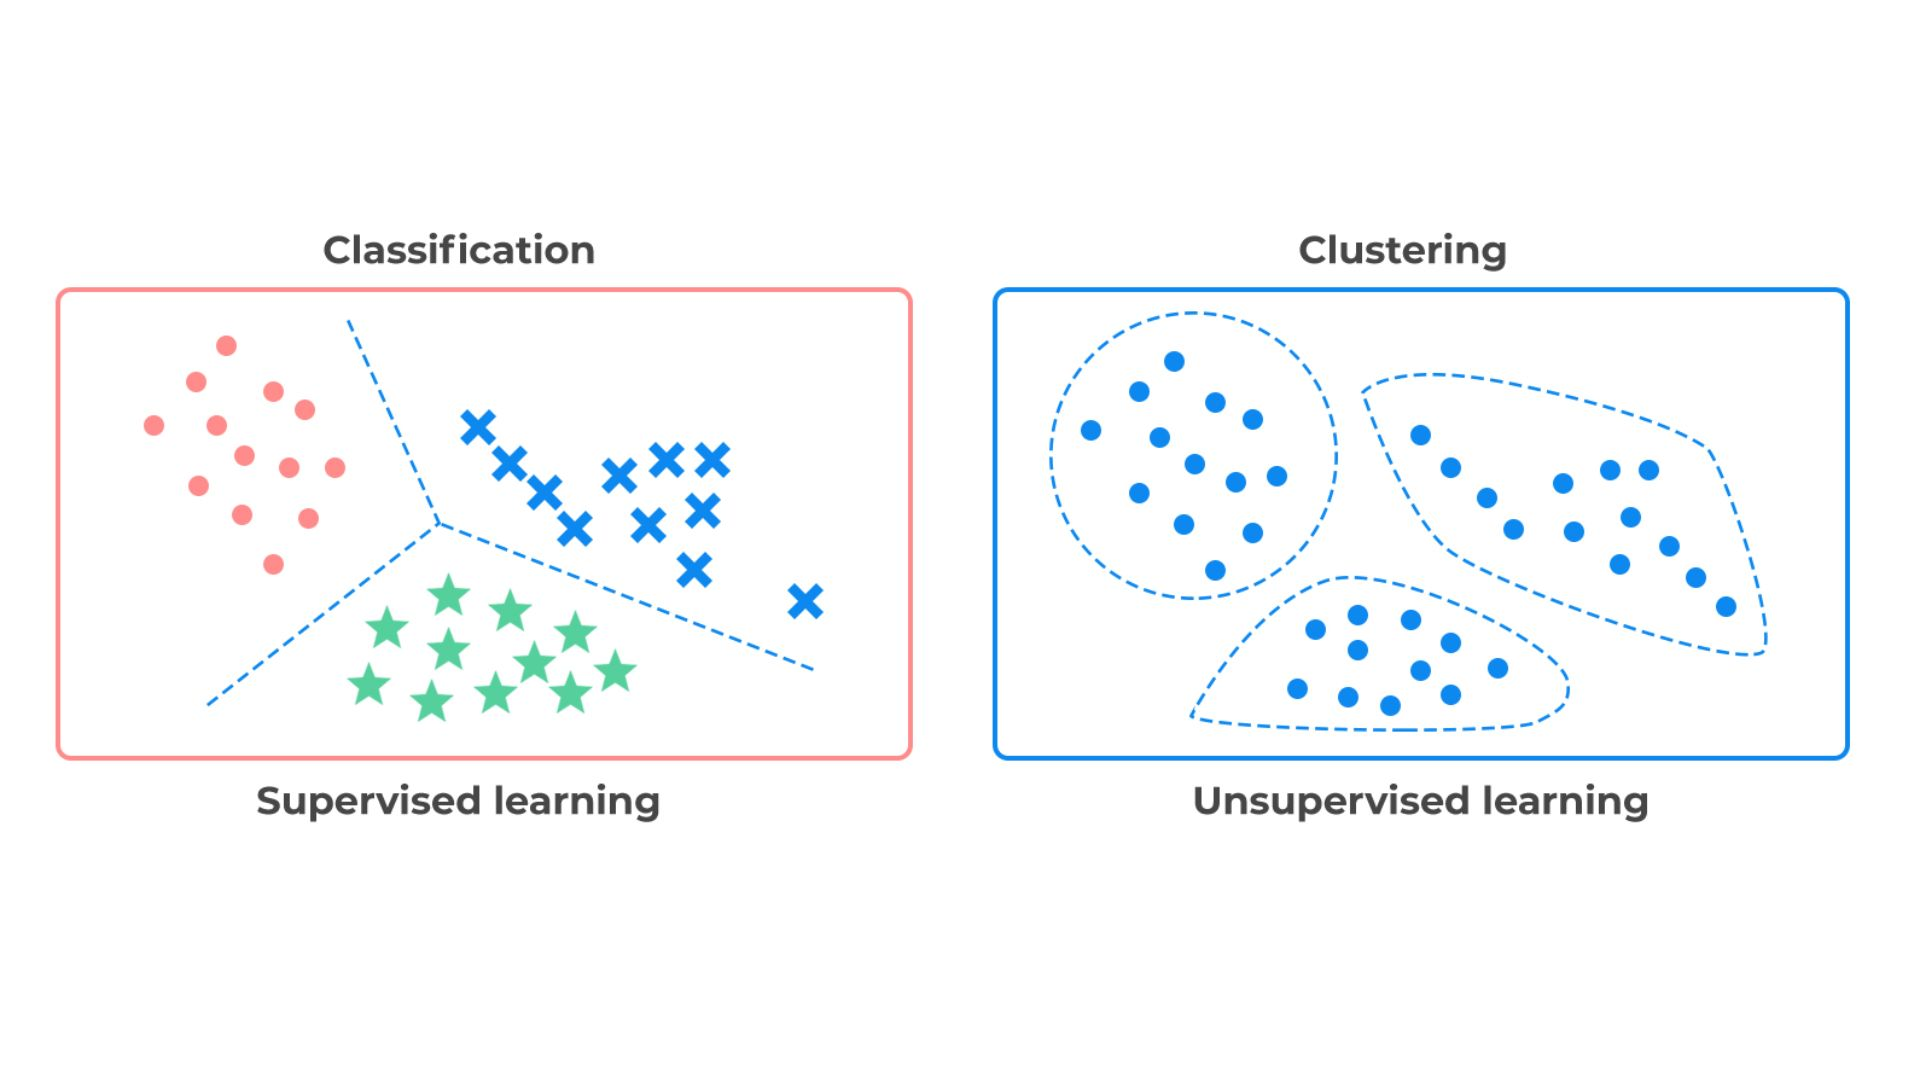






## Reinforcement learning

---


### It is a type of machine learning in which the agent learns by trial and error. The agent is given a reward for taking actions that lead to desired outcomes, and a penalty for taking actions that lead to undesired outcomes. The agent learns to take actions that maximize its rewards. For example.....


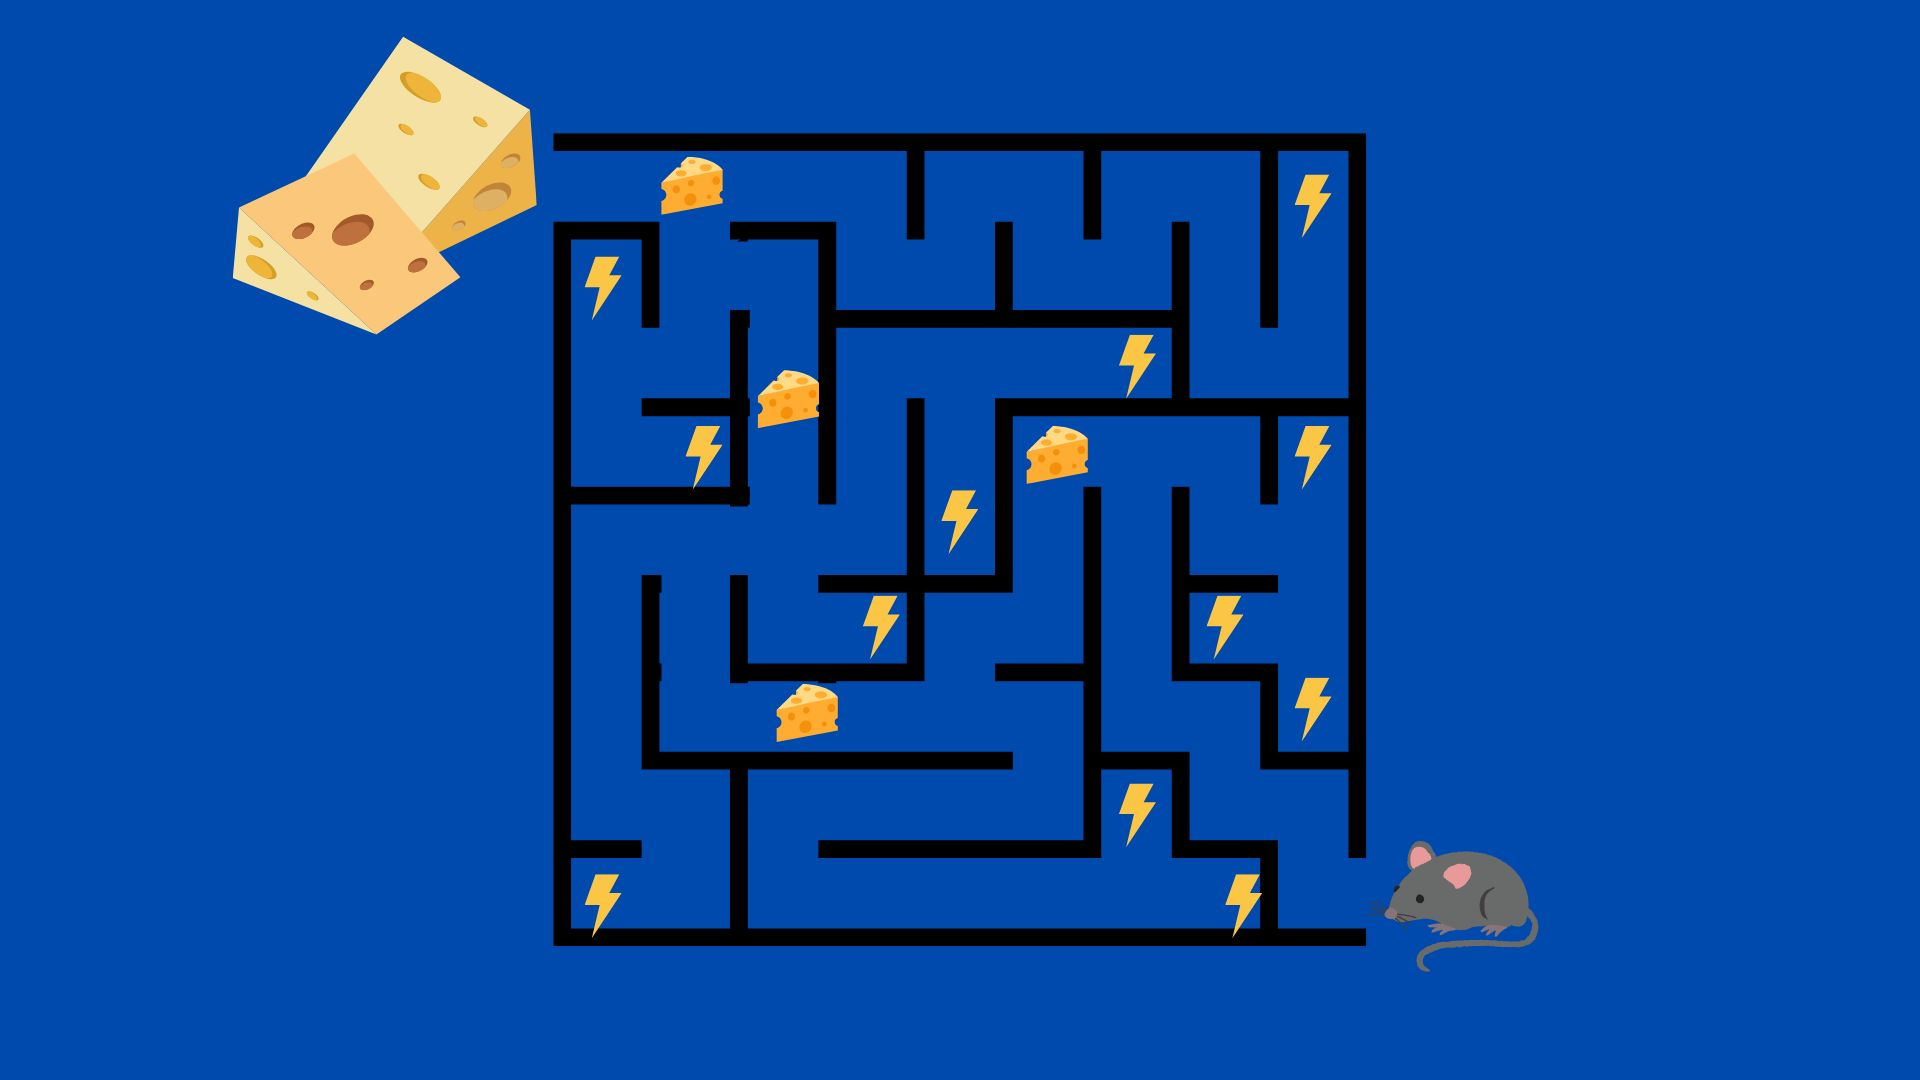

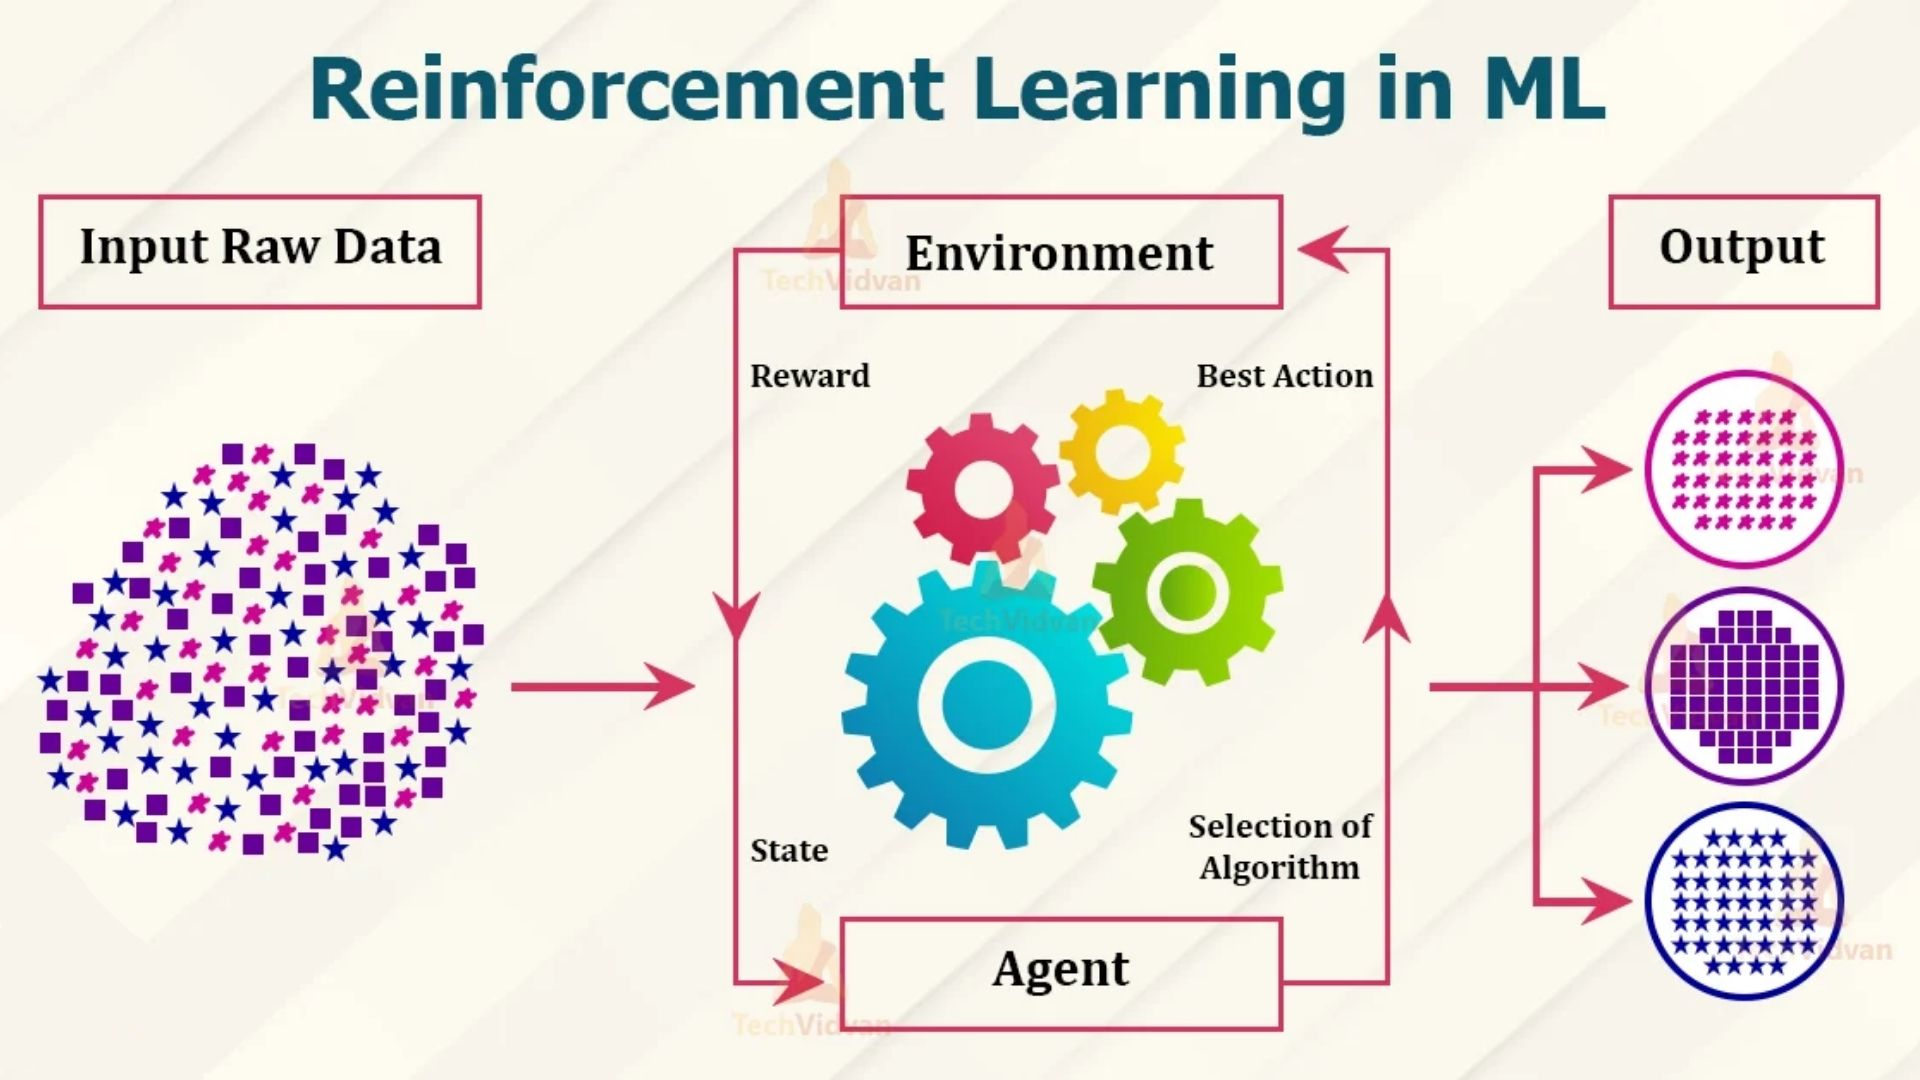

# Machine Learning Models Trained on the Entire Dataset

# **Imports**

Importing the pandas library for data manipulation and analysis
and the numpy library for numerical operations and array manipulations


In [23]:
import pandas as pd
import numpy as np

In [24]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

Reading a CSV file into a DataFrame for further data analysis


In [25]:
df = pd.read_csv('/content/new_preprocessed_loan_data.csv')
df.head()

,Unnamed: 0,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Annual_Income,Debt_to_Income_Ratio,Verification_Status,...,Public_Record,Total_Accounts,Total_Received_Principal,Total_Received_Interest,Purpose,Loan_Status,Issue_Month,Issue_Year,region,Risk_Category
0,0,5000.0,10.65,162.87,36,10.0,RENT,24000.0,27.65,Verified,...,0.0,9.0,5000.00,861.07,credit_card,Fully Paid,Dec,2011.0,SouthWest,Low Risk
1,1,2500.0,15.27,59.83,60,0.5,RENT,30000.0,1.00,Source Verified,...,0.0,4.0,456.46,435.17,car,Charged Off,Dec,2011.0,SouthEast,High Risk
2,2,2400.0,15.96,84.33,36,10.0,RENT,12252.0,8.72,Not Verified,...,0.0,10.0,2400.00,603.65,small_business,Fully Paid,Dec,2011.0,MidWest,Low Risk
3,3,10000.0,13.49,339.31,36,10.0,RENT,49200.0,20.00,Source Verified,...,0.0,37.0,10000.00,2209.33,other,Fully Paid,Dec,2011.0,West,Low Risk
4,4,5000.0,7.90,156.46,36,3.0,RENT,36000.0,11.20,Source Verified,...,0.0,12.0,5000.00,631.38,wedding,Fully Paid,Dec,2011.0,SouthWest,Low Risk


# **Feature Engineering**

Accessing the column labels of the DataFrame


In [26]:
df.dropna(inplace=True)

In [27]:
df['Home_Ownership'].value_counts()

,count
Home_Ownership,
MORTGAGE,89864
RENT,79639
OWN,14624
OTHER,168
NONE,42
ANY,1


In [28]:
df['Verification_Status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [29]:
df['Verification_Status'] = df['Verification_Status'].replace('Source Verified', 'Verified')

In [30]:
df = df[df['Home_Ownership'] != 'NONE']
df = df[df['Home_Ownership'] != 'ANY']

Dropping the 'Unnamed: 0' column from the DataFrame

In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df['Terms(Months)'].value_counts()

,count
Terms(Months),
36,145041
60,39254


Defining a list of columns to be dropped and Dropping specified columns from the DataFrame

In [33]:
columns_to_drop = ['Delinquency_2yrs', 'Total_Accounts','Sub_Grade',
       'Total_Received_Principal', 'Total_Received_Interest',
                   'Loan_Status', 'Issue_Month', 'Issue_Year', 'region',
                   'Public_Record', 'Annual_Income']
                   # 'Debt_to_Income_Ratio','Installment''Open_Accounts',
df = df.drop(columns=columns_to_drop)

In [34]:
df.columns

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Purpose',
       'Risk_Category'],
      dtype='object')

Creating a new column `'Total_Received_Amount'` by summing `'Total_Received_Principal'` and `'Total_Received_Interest'` and dropping others

Displaying the first five rows of the updated DataFrame

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184295 entries, 0 to 191368
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Loan_Amount           184295 non-null  float64
 1   Interest_Rate         184295 non-null  float64
 2   Installment           184295 non-null  float64
 3   Terms(Months)         184295 non-null  int64  
 4   Employment_Length     184295 non-null  float64
 5   Home_Ownership        184295 non-null  object 
 6   Debt_to_Income_Ratio  184295 non-null  float64
 7   Verification_Status   184295 non-null  object 
 8   Grade                 184295 non-null  object 
 9   Open_Accounts         184295 non-null  float64
 10  Purpose               184295 non-null  object 
 11  Risk_Category         184295 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 18.3+ MB


In [36]:
df['Purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

# **Label Encoding**

Convert categorical variables into numerical values using Label Encoding and One-Hot Encoding.

Importing LabelEncoder and OneHotEncoder for encoding categorical variables. Initializing a dictionary to store LabelEncoders and defining ordinal columns to be label encoded.Looping through ordinal columns, fitting and transforming them with LabelEncoder, and storing the encoders. Defining nominal columns to be one-hot encoded and applying one-hot encoding.


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['Purpose']
df = pd.get_dummies(df, columns=nominal_columns)

In [38]:
df.head()

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,RENT,27.65,Verified,B,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,RENT,1.00,Verified,C,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,RENT,8.72,Not Verified,C,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,RENT,20.00,Verified,C,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,RENT,11.20,Verified,A,9.0,...,False,False,False,False,False,False,False,False,False,True


In [39]:
le_verification_status = LabelEncoder()
df['Verification_Status'] = le_verification_status.fit_transform(df['Verification_Status'])

In [40]:
le_grade = LabelEncoder()
df['Grade'] = le_grade.fit_transform(df['Grade'])

le_home_ownership=LabelEncoder()
df['Home_Ownership'] = le_home_ownership.fit_transform(df['Home_Ownership'])


In [41]:
verification_status_mapping = dict(zip(le_verification_status.classes_, le_verification_status.transform(le_verification_status.classes_)))
grade_mapping = dict(zip(le_grade.classes_, le_grade.transform(le_grade.classes_)))
home_ownership_mapping = dict(zip(le_home_ownership.classes_, le_home_ownership.transform(le_home_ownership.classes_)))

print("Verification Status Mapping:", verification_status_mapping)
print("Grade Mapping:", grade_mapping)
print("Home Ownership Mapping:", home_ownership_mapping)

Verification Status Mapping: {'Not Verified': 0, 'Verified': 1}
Grade Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Home Ownership Mapping: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184295 entries, 0 to 191368
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 184295 non-null  float64
 1   Interest_Rate               184295 non-null  float64
 2   Installment                 184295 non-null  float64
 3   Terms(Months)               184295 non-null  int64  
 4   Employment_Length           184295 non-null  float64
 5   Home_Ownership              184295 non-null  int64  
 6   Debt_to_Income_Ratio        184295 non-null  float64
 7   Verification_Status         184295 non-null  int64  
 8   Grade                       184295 non-null  int64  
 9   Open_Accounts               184295 non-null  float64
 10  Risk_Category               184295 non-null  object 
 11  Purpose_car                 184295 non-null  bool   
 12  Purpose_credit_card         184295 non-null  bool   
 13  Purpose_debt_consol

In [43]:
df.head()

,Loan_Amount,Interest_Rate,Installment,Terms(Months),Employment_Length,Home_Ownership,Debt_to_Income_Ratio,Verification_Status,Grade,Open_Accounts,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,5000.0,10.65,162.87,36,10.0,3,27.65,1,1,3.0,...,False,False,False,False,False,False,False,False,False,False
1,2500.0,15.27,59.83,60,0.5,3,1.00,1,2,3.0,...,False,False,False,False,False,False,False,False,False,False
2,2400.0,15.96,84.33,36,10.0,3,8.72,0,2,2.0,...,False,False,False,False,False,False,False,True,False,False
3,10000.0,13.49,339.31,36,10.0,3,20.00,1,2,10.0,...,False,False,False,False,False,True,False,False,False,False
4,5000.0,7.90,156.46,36,3.0,3,11.20,1,0,9.0,...,False,False,False,False,False,False,False,False,False,True


In [44]:
df_new=df.copy()

Counting the occurrences of each unique value in the 'Risk_Category' column

In [45]:
df_new['Risk_Category'].value_counts()

,count
Risk_Category,
Low Risk,142827
High Risk,36760
Moderate Risk,4708


Creating a dictionary to map 'Risk_Category' values to numerical representations. 'High Risk' is mapped to 2, 'Moderate Risk' to 1, and 'Low Risk' to 0.Applying the mapping to the 'Risk_Category' column in the DataFrame to convert categorical risk levels to numerical values.


Counting and displaying the occurrences of each unique numerical value in the 'Risk_Category' column

In [46]:
risk_mapping = {
    'High Risk': 2,
    'Moderate Risk': 1,
    'Low Risk': 0
}

df_new['Risk_Category'] = df_new['Risk_Category'].map(risk_mapping)


In [47]:
df_new['Risk_Category'].value_counts()

,count
Risk_Category,
0,142827
2,36760
1,4708


Listing the names of all columns in the updated DataFrame

In [48]:
df_new.columns

Index(['Loan_Amount', 'Interest_Rate', 'Installment', 'Terms(Months)',
       'Employment_Length', 'Home_Ownership', 'Debt_to_Income_Ratio',
       'Verification_Status', 'Grade', 'Open_Accounts', 'Risk_Category',
       'Purpose_car', 'Purpose_credit_card', 'Purpose_debt_consolidation',
       'Purpose_educational', 'Purpose_home_improvement', 'Purpose_house',
       'Purpose_major_purchase', 'Purpose_medical', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

# **Outlier Removal**

Defining a function to remove outliers from specified columns using the IQR method by filtering values within the calculated bounds. Applying this function to columns of interest to clean the DataFrame.

<Axes: ylabel='Interest_Rate'>

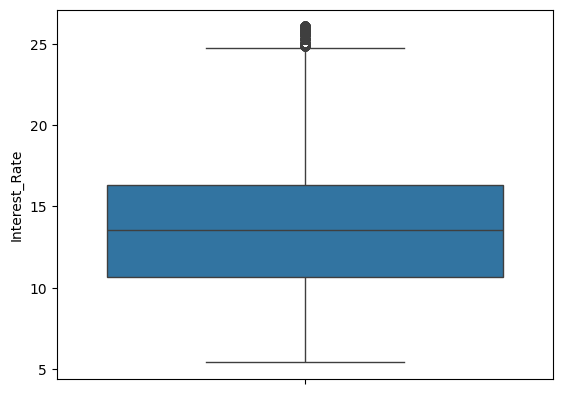

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df_new['Interest_Rate'])

In [50]:
def remove_outliers_iqr(df_new, columns):

    for column in columns:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
    return df_new

columns_to_check = ['Loan_Amount', 'Interest_Rate','Employment_Length']
df_new = remove_outliers_iqr(df_new, columns_to_check)


<Axes: ylabel='Interest_Rate'>

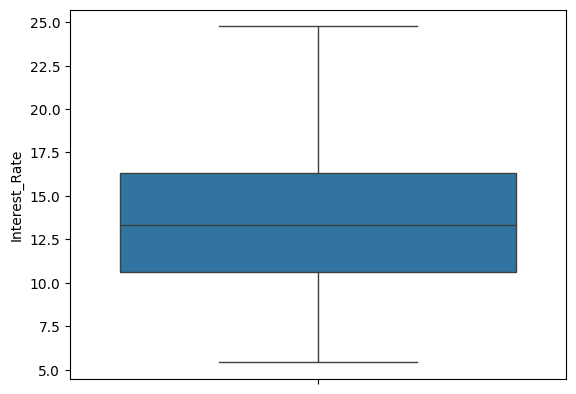

In [51]:
sns.boxplot(df_new['Interest_Rate'],whis=1.5)

In [52]:
df_new['Terms(Months)'].value_counts()

,count
Terms(Months),
36,142238
60,35039


Removing all rows with missing values from the DataFrame and updating it in place

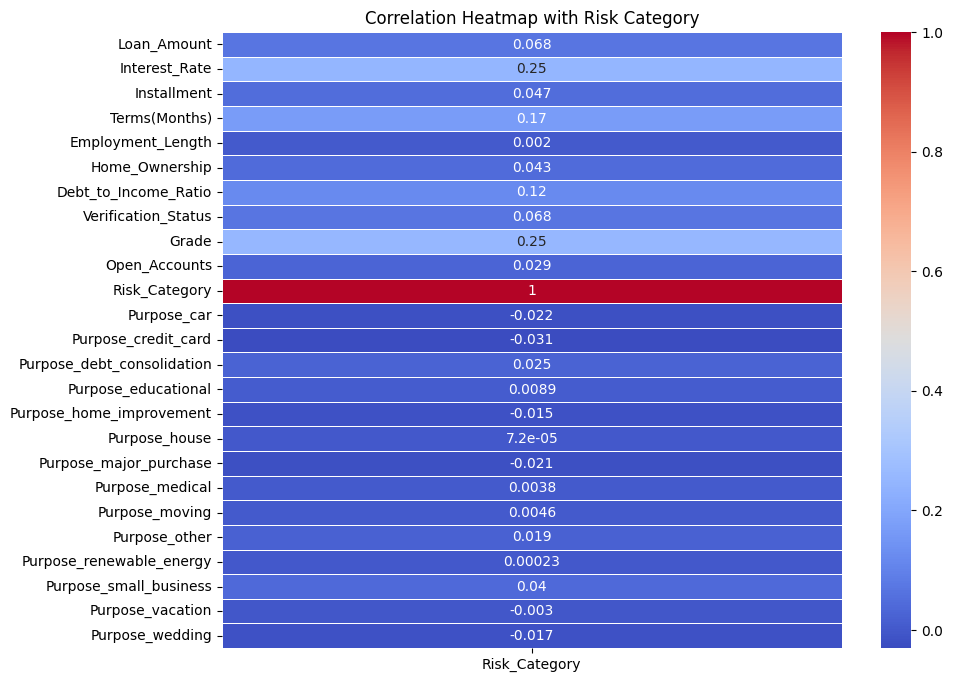

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with the 'Risk_Category' and other relevant columns

# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Extract the correlation of each feature with the 'Risk_Category'
risk_category_corr = correlation_matrix[['Risk_Category']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(risk_category_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Risk Category')
plt.show()


In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177277 entries, 0 to 191368
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Loan_Amount                 177277 non-null  float64
 1   Interest_Rate               177277 non-null  float64
 2   Installment                 177277 non-null  float64
 3   Terms(Months)               177277 non-null  int64  
 4   Employment_Length           177277 non-null  float64
 5   Home_Ownership              177277 non-null  int64  
 6   Debt_to_Income_Ratio        177277 non-null  float64
 7   Verification_Status         177277 non-null  int64  
 8   Grade                       177277 non-null  int64  
 9   Open_Accounts               177277 non-null  float64
 10  Risk_Category               177277 non-null  int64  
 11  Purpose_car                 177277 non-null  bool   
 12  Purpose_credit_card         177277 non-null  bool   
 13  Purpose_debt_consol

In [55]:
feature_columns = df_new.columns[df_new.columns != 'Risk_Category']
target_column = 'Risk_Category'

In [56]:
X = df_new[feature_columns]
y = df_new[target_column]

## Scaling the Dataset

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X_scaled

array([[-1.07351186, -0.6845975 , -1.06723899, ..., -0.14650361,
        -0.07937783, -0.10347471],
       [-1.42206845,  0.41110791, -1.54294565, ..., -0.14650361,
        -0.07937783, -0.10347471],
       [-1.43601071,  0.57475223, -1.42983605, ...,  6.82577036,
        -0.07937783, -0.10347471],
       ...,
       [-0.51582131, -0.24821266, -0.42934701, ..., -0.14650361,
        -0.07937783, -0.10347471],
       [-0.37639867, -0.12962982, -0.26379148, ..., -0.14650361,
        -0.07937783, -0.10347471],
       [ 1.04919779,  0.6530169 ,  0.46592703, ..., -0.14650361,
        -0.07937783, -0.10347471]])

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [62]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)